<a href="https://colab.research.google.com/github/jfarias11/worskshop-test/blob/main/Farias_J_BDSiC_Day3_Bredo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda
---
1. Review: random sampling from population. (**we want to learn about a population, but we only have a sample**).
    * It should be random. Random Samples differ from each other and from the sample because they are... drum roll...**random**.

2. Hypothesis testing overview
    1. What **is** evidence? p-values, type I and type II errors.
    2. Multiple testing

3. A summary of the common tests (variables)
    1. Correlation: **Pearson's correlation coefficient**
    2. Models: **Ordinary Linear Regression (OLS)**
    3. Comparison of means: **Student's t test**

## Additional Resources
**Which test should I use? flowcharts:**

1. https://www.glabstat.com/test-flowchart
2. https://www.afit.edu/STAT/statcoe_files/Interactive%20Inferential%20Statistics%20Flowchart.pdf
3. https://statsandr.com/blog/files/overview-statistical-tests-statsandr.pdf

**p-values and errors**
1. http://www.intuitor.com/statistics/T1T2Errors.html

**Confusion Matrix**
1. https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
2. https://en.wikipedia.org/wiki/Confusion_matrix

**ROC Curves**
1. reasonable summary of AuROC terms: https://www.cs.rpi.edu/~leen/misc-publications/SomeStatDefs.html
2. https://medium.com/@shaileydash/understanding-the-roc-and-auc-intuitively-31ca96445c02

# Review: Random Sampling
---

<div>
<img src="https://raw.githubusercontent.com/awnorowski/BDSiC_2025/refs/heads/main/images/Sampling.png" width="75%"/>
</div>

NOTE: In Data Science (and Machine Learning) it is **particularly** crucial that your sample (or your learning data) is pulled from the same population that will be predicted! Many horrible injustices occur when the sample data is different from the actual population that you are trying to learn something about.

#### Which provides a better strategy for inferential statistics?

Both strategies cost the same, but which one is ’better’ sampling? <br>
**Option 1**: Sample 1000 genomes 5 times <br>
**Option 2**: Sample 5 genomes 10 times <br>

Explain your answer.

(This simulation doesn’t match to these sample sizes exactly, but it might help to compare the extreme sizes: https://onlinestatbook.com/stat_sim/sampling_dist/index.html)

# Hypothesis Testing
---
There are several common inferential tests: correlation, regression, comparison of means (and non-parametric analogues).

There is **ONE FRAMEWORK** - hypothesis testing.

In order to try to be objective (and reduce bias), we use a hypothesis testing pipeline for inference: Applied Epistemology
* We use systematic criteria for decision making
* Attempts to avoid bias

<div>
<img src="https://raw.githubusercontent.com/awnorowski/BDSiC_2025/refs/heads/main/images/hypothesistestingpipeline.png" width="50%">
</div>

## Evidence: p-values and errors
---
### What is a p-value?
"The probability of obtaining your result (outcome) GIVEN THAT THE NULL HYPOTHESIS IS TRUE."

* In hypothesis testing, there is only ONE hypothesis being tested and the null DISTRIBUTION is based on the values in this (null) hypothesis (Ho).
* The p-value quantifies how 'weird'/'unusual' our result is.
* Compare p-value to a pre-determined significance level $\alpha$ (usually 0.05)
    * if p-value < $\alpha$ --> REJECT null hypothesis
    * if p-value > $\alpha$ ---> FAIL TO REJECT null hypothesis



### Type I and Type II errors

**Type 1 error** = $\alpha$ = P\[Rejecting Ho|Ho is true\] = False positive <br>
(i.e. the probability of rejecting Ho, given Ho is true)
    
**Type 2 error** = $\beta$ = P\[Failing to reject Ho|Ho is NOT true\] = False negative <br>
(i.e. the probability of failing to reject Ho, given Ho is NOT true)

**Note:** The significance level and Type 1 error are both $\alpha$ because your significance level represents the *highest value of Type 1 error you are willing to risk in drawing your conclusions about whether to reject Ho.*

<div>
<img src="https://raw.githubusercontent.com/awnorowski/BDSiC_2025/refs/heads/main/images/typeItypeIIdiagram.png" width="75%">
</div>


#### Example of Errors
A story (from "Calling Bullshit") about evidence from huge databases... something we will all have to be better trained on in the near future.

A high profile art heist without any leads except for one fingerprint. The FBI ran the fingerprint through their database and they find a match....with no alibi. What is the probability that this person committed the crime?

There is a 1 in 10,000,000 chance that two different, distinct fingerprints would match (the error rate).

|Truth|Match| No Match|
|-----|-----|---------|
Guilty|||
Not Guilty (Innocent)|||


So, we know - since the fingerprints gave a 'match' that the table looks like this:

|Truth|Match| No Match|
|-----|-----|---------|
Guilty| 1 person| 0 people|
Not Guilty (Innocent)|||

How many people are in the FBI fingerprinting database? **50,000,000** and we know that there is a error in matching 1 per 10,000,000 so the table now looks like this:

|Truth|Match| No Match|
|-----|-----|---------|
Guilty| 1 person| 0 people|
Not Guilty (Innocent)|5 people| 50,000,000 people|

So the P(Innocent|fingerprints match) = 5/6

Note that this is quite different from P(fingerprints match|Innocent) = 1/10,000,000

Confusing the two probabilities above is called the **prosecutors fallacy....**

#### Confusion Matrix
<div style="text-align: center">
<img src='https://raw.githubusercontent.com/awnorowski/BDSiC_2025/refs/heads/main/images/confusionmatrix.png' width="50%">
</div>

### Other Important Terms in Data Science:
1. **Power**  = 1-$\beta$ = 1-P[FTR|Ho is not true] <-- ability to distinguish true differences

2. **Sensitivity** (another name for Power, also called **Recall**) = 1-$\beta$ = True Positive/(True Positive +False Negative)

3. **Specificity** = 1-$\alpha$ = True Negative /(True Negative + False Positive)

4. **Accuracy** = (TP+TN)/(TP+TN+FP+FN)

5. **Precision** = TP/(TP+FP)

6. **AuROC** (Area Under the Receiver Operating Characteristic curve)
    * Used in medical testing and diagnostic radiology etc.
    * It is used for comparing test results across multiple thresholds
    * Measures how well a diagnostic test can distinguish between positive and negative case
    * Power (true positive rate, or TPR) (y axis) versus FPR (false positive rate) (x axis)
        * FPR = 1-specificity = FP/(FP+TN)

## THE PROBLEM OF MULTIPLE TESTING
---
Two independent studies are performed to test the same null hypothesis. What is the probability that one or both of the studies obtains a significant result and rejects the null hypothesis even if the null hypothesis is true? Assume that in each study there is a 0.05 probability of rejecting the null hypothesis.
1. 0.025
2. 0.10
3. 0.075
4. 0.05

**Answer (for discussion):**

You can consider the previous question in one of two equally valid ways:

**Option 1**

P\[at least 1 study obtains significant results] = 1 - P\[neither study obtains significant results] = 1 – (1 - 0.05)^2 = 0.0975

**Option 2**

P\[1st study significant OR 2nd study is significant] = P\[1st study significant] + P\[2nd study significant] - P\[both significant] = (0.05) + (0.05) – (0.05)^2 = 0.095

**The ENORMOUS ISSUE: $\alpha$=.0975**

The experimenter thinks that they are using an $\alpha$=0.05, but they are actually using an $\alpha$=0.0975

# Types of Inference Tests
---
- Association between variables: **Pearson's correlation coefficient**
- Models: **Ordinary Linear Regression (OLS)**
  - **simple linear regression**
    - effect size
    - p-value
    - interpretation
  - **multiple linear regression**
    - confounding
  - working with **transformed data**
- Comparison of means: **Student's t test**

Before we dive in, let's set up our notebooks and import modules.

In [ ]:
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# Import seaborn and apply its plotting styles
import seaborn as sns

# Statmodels & patsy
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import pearsonr, norm, ttest_ind, skewnorm

In [ ]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

2.0.2
2.2.2
0.13.2


In [ ]:
sns.set_theme(style="white",
              font_scale=2,
              rc={'axes.spines.right': False,'axes.spines.top': False}) # this last thing is equivalent to always having sns.despine()


# set plotting size parameter
plt.rcParams['figure.figsize'] = (8, 8)

#improve resolution
#%config InlineBackend.figure_format ='retina'

## Correlation
---
Correlation is a statistical association, or relationship, between variables.
* Pearson Correlation
* Spearmans' correlation
* Chi-squared test

<br>

**Example of correlation between quantitative variables:**
<div>
<img src='https://statistics.laerd.com/statistical-guides/img/pc/pearson-1-small.png' width="50%">
</div>

*Image from https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php*

Correlation between quantitative variables can be assessed through correlation coefficients.

<br>

**Example of correlation between categorical variables**
<div>
<img src="https://raw.githubusercontent.com/awnorowski/BDSiC_2025/refs/heads/main/images/contingency.png" width="50%">
</div>

Contingency tables are used to examine correlations between categorical variables through tests like chi-squared test and Fisher's exact test.

<br>

**Statistics Libraries in Python**

numpy, pandas and other libraries have built in functions to calculate these types of statistics.

### Correlation: Pearson correlation ($r$)

- Measures the strength of association between two variables
- Takes values [-1,1]
- Positive Correlation
    - $r$ > 0
    - as $r$ approaches 1, x and y are highly correlated
    - $r$ approaching 1 can happen with a shallow sloped line of regression
    - $r$ approaching (not quite) 0 can happen with a steep sloped line of regression
- Negative Correlation
    - $r$ < 0
    - as $r$ approaches -1, x and y are highly negatively correlated
    - $r$ approaching -1 can happen with a shallow sloped line of regression
    - $r$ approaching (not quite) 0 can happen with a steep sloped line of regression
- Zero Correlation
   - $r \approx 0$
   - as $r$ approaches 0, x and y are not correlated
   - as $r$ approaches 0, the slope of the line of regression becomes 0 (horizontal)

<div>
<img src='https://statistics.laerd.com/statistical-guides/img/pc/pearson-2-small.png' width="50%">
</div>

*Image from https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php*

<br>

Let's examine a coding example.

correlation coefficients:
 [[1.         0.00404702]
 [0.00404702 1.        ]]


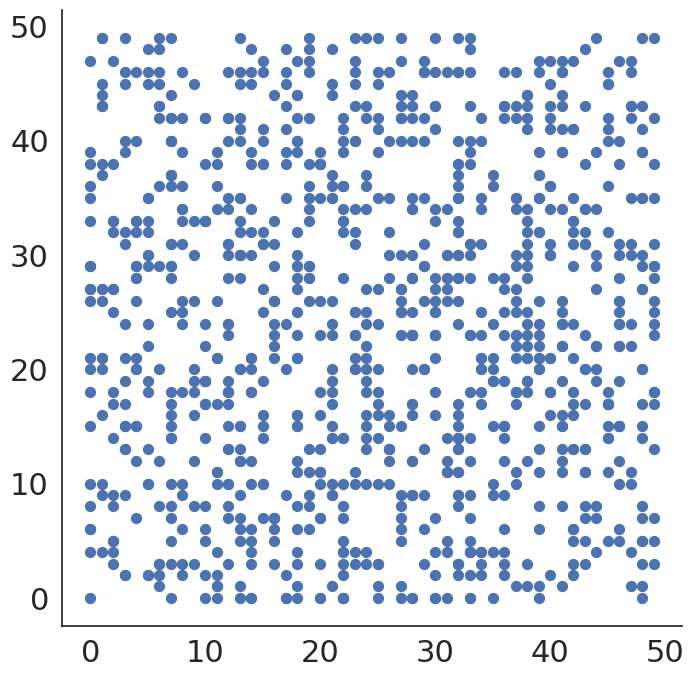

In [ ]:
np.random.seed(1)

# x and y are uncorrelated because they are independent draws of random numbers
# the value of x does not depend on the corresponding value of y and vice versa
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

plt.scatter(x, y, s=50);
print('correlation coefficients:\n', np.corrcoef(x, y))

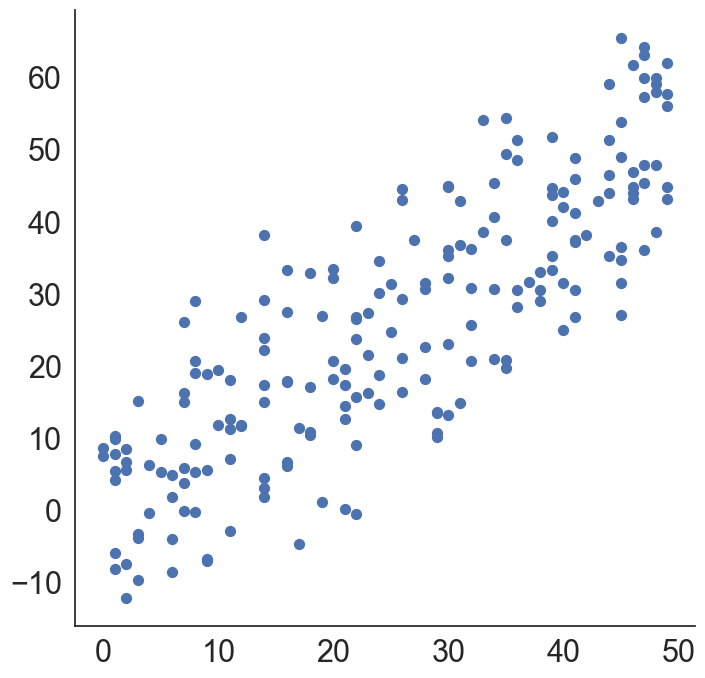

In [ ]:
# Quick: what would you expect the correlation to be in the following:
# --------------------------------
# setting a random seed makes this answer repeatable
np.random.seed(888)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 200)
y = x + np.random.normal(0, 10, 200)

plt.scatter(x, y, s=50);

## Models (Regression)
---

Regression: Does a change in one variable change another variable?
* ordinary least squares, line of best fit
* assumptions (especially no multicollinearity)
* problem of overfitting
* problem of confounding (shoe size and literacy)
* stratification can change outcomes and relationship

**To learn about regression, we will examine a dataset on poverty levels across US states:**

In [ ]:
# data on poverty in states: https://raw.githubusercontent.com/shanellis/datasets/master/index.txt
df = (pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/index.txt', sep='\t')
      .set_index('Location') )
df.head()
# spend some time exploring this data set!


,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
Location,,,,,
Alabama,20.1,31.5,88.7,11.2,54.5
Alaska,7.1,18.9,73.7,9.1,39.5
Arizona,16.1,35.0,102.5,10.4,61.2
Arkansas,14.9,31.6,101.7,10.4,59.9
California,16.7,22.6,69.1,11.2,41.1


**So, which two variables from the poverty/state data above...**
would you like to explore with a linear regression?  I'm going to start with my own pick, but you can modify these cells to do what you want :)

### Assumptions of Linear Regression

1. Linear relationship
2. No multicollinearity
    * correlation of several independent variables
3. No auto-correlation
    * correlation of a time-based signal with a delayed/lagged version of the same signal
4. Homoscedasticity
    * the variance of the errors of the model is constant (or, the spread of the data around the regression line is constant)


In a simple linear regression model, the estimate regression line is given by:
$$outcome = \beta_0 + \beta_1*predictor$$

<br>

Let's check these assumptions in the data!

* There's no multi colinearity because we are only exploring two variables.
* There's no auto-correlation because there's no time variable here.

You can check for all of these issues with tools built into our regression package [`statsmodels`](https://www.statsmodels.org/stable/diagnostic.html).

### Using `statsmodels` for Regression
We will use the `statsmodels` package to build an ordinary linear regression with the `.ols` function.

In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# There is an OLD SKOOL way to do this using just statsmodels.api,
# but its much nicer to use the MODERN formulae interface instead!
# I suggest that you just always use this!
model = smf.ols(formula='TeenBrth ~ PovPct', data=df)


In [ ]:
model# tab complete to see all the things inside the model object

In [ ]:
## fit the model
results = model.fit()
#print results #not what we usually want
##look at results


## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           8.67e-09
Time:                        18:20:55   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

#### Question #1

What is the effect size of the relationship between Poverty Percentage and Teen Birth Rate?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

**Answer:**

First, let's examine our equation:
$$outcome = \beta_0 + \beta_1*predictor$$
$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$
- If the Poverty Percentage were 0, the Teen Birth Rate would be **15.67** (The Intercept, $\beta_0$)
- For every 1 unit increase in Poverty Percentage, you expect to see a **2.03** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

#### Question #2

Which value represents the expected Teen Birth Rate if the Poverty Percentage were 0?

- A) 15.67
- B) 2.03
- C) 4.032
- D) 0.495

**Answer:**

Again, let's examine our equation:
$$outcome = \beta_0 + \beta_1*predictor$$
$$ Teen Birth = 15.67 + 2.03  * Poverty Percentage $$
- If the Poverty Percentage were 0, the Teen Birth Rate would be **15.67** (the intercept, $\beta_0$)

#### Estimates:

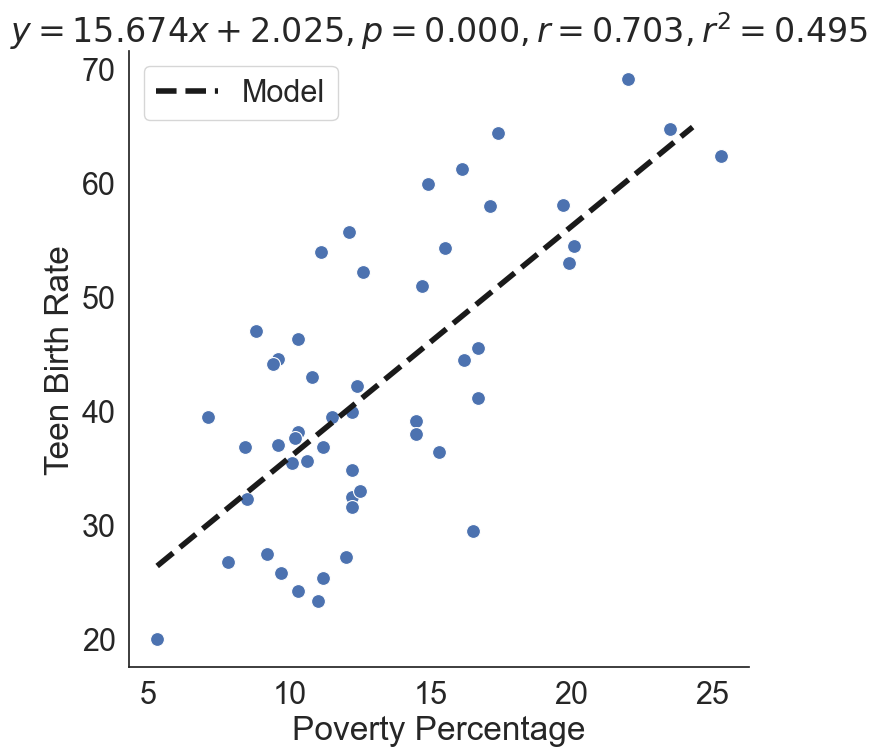

In [ ]:
# Plot the orginal data (as before)
sns.scatterplot(x='PovPct', y='TeenBrth', data=df, s=100)

# Generate and plot the model fit line
xs = np.arange(df['PovPct'].min(), df['PovPct'].max())
ys = results.params.iloc[1] * xs + results.params.iloc[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

# make the title tell us model parameters: chatGPT was helpful for this code!
vals='$y={:.3f}x + {:.3f}, p={:.3f}, r={:.3f}, r^2={:.3f}$'.format(results.params.iloc[0],
                                                                   results.params.iloc[1],
                                                                   results.pvalues.iloc[1],
                                                                   df[['PovPct','TeenBrth']].corr().iloc[0,1],
                                                                   results.rsquared)
plt.title(vals);

plt.xlabel('Poverty Percentage')
plt.ylabel('Teen Birth Rate')
plt.legend();

Based on the graph:

If I told you the Poverty Percentage of a state was 15, what would you estimate would be its Teen Birth Rate?
- A) ~ 0
- B) ~ 35
- C) ~ 45
- D) ~ 55
- E) ~ 60

<br>

Which of the following is a reasonable estimate (guess) of Teen Birth Rate for a state with a Poverty Percentage of 20?

- A) 55.99
- B) 56.27
- C) 56.5
- D) A - C
- E) None of the above

<br>

What is our conclusion from this analysis? (Question: Is Poverty Percentage correlated with Teen Birth Rate?)

- A) Reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- B) Reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate
- C) Fail to reject the null; There is no relationship between Poverty Percentage and Teen Birth Rate
- D) Fail to reject the null; There is a relationship between Poverty Percentage and Teen Birth Rate

<br>

**REMEMBER**: Correlation $\neq$ Causation!

If we conclude there is a relationship between the variables, we still do **_NOT_** know whether poverty percentage increases cause teen birth rate increases or vice versa. There could be other variables or factors causing this relationship!

### Multiple Linear Regression

So far, we've only been looking at the relationship between one measure (Poverty Percentage) and Teen Birth.

*But*, Poverty Percentage is likely *not* the only thing that is correlated with Teen Birth Rate.

We could imagine that Violent Crime rates in a location may be associated with Poverty Percentage and could possibly also be associated with Teen Birth Rate. (A confounder!)

This is where **multiple linear regression** is incredibly helpful. Multiple linear regression allows you to measure the effect of multiple predictors on an outcome.

Let's do some exploratory data analysis (EDA) first to see if our hypothesis (Violent Crime is related to Teen Birth) holds up in our data at all.

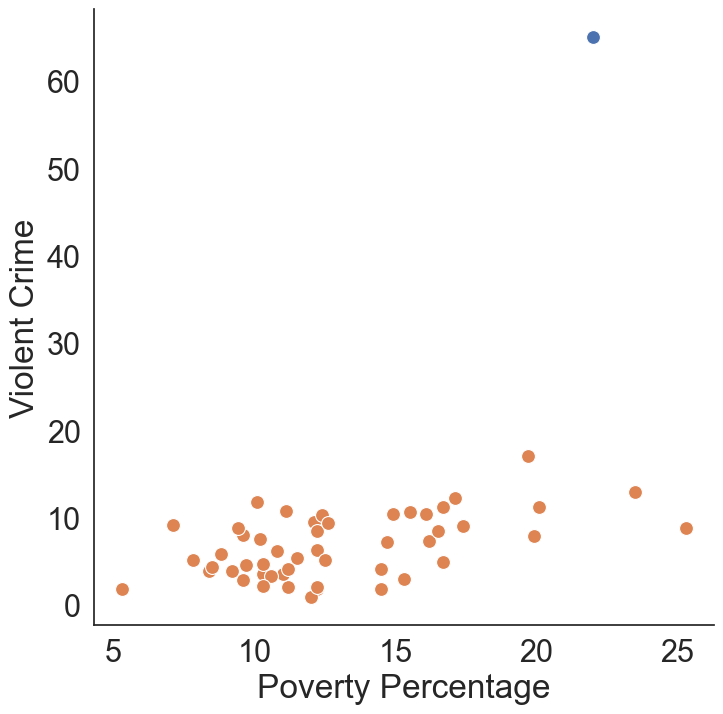

In [ ]:
# relationship between predictors
sns.scatterplot(x='PovPct', y='ViolCrime', data=df, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime')
# there appears to be an outlier
df[df['ViolCrime'] > 50]
# removing DC
df_noDC = df[df['ViolCrime'] < 50]

# relationship between predictors
# after removing outlier
sns.scatterplot(x='PovPct', y='ViolCrime', data=df_noDC, s=100)
plt.xlabel('Poverty Percentage')
plt.ylabel('Violent Crime');
# notice it does this cool thing where the second plot overwrites the original plot, but with orange dots.
# the remaining blue dot is the outlier that was removed in the second plot.

Yay, now we can see what looks like a potentially linear relationship between poverty and violent crime.

But BEWARE!  Removing an outlier WILL change the coefficients of the regression!

We did it here because the outlier was so big it might destroy the linear relationship.  But that's a judgement call, there is no "right way" when it comes to outlier removal, except to keep track of your justification.

Maybe if you've got time, you should rerun the analysis below WITHOUT removing DC... see what's different :)

In [ ]:
mod = smf.ols(formula='TeenBrth ~ ViolCrime', data=df_noDC)
resvc = mod.fit()
print(resvc.summary())

mod = smf.ols(formula='TeenBrth ~ PovPct + ViolCrime', data=df_noDC)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     49.94
Date:                Mon, 19 May 2025   Prob (F-statistic):           5.81e-09
Time:                        15:28:42   Log-Likelihood:                -176.12
No. Observations:                  50   AIC:                             356.2
Df Residuals:                      48   BIC:                             360.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0510      2.511     10.374      0.0


Which has a larger effect on Teen Birth Rate?

- A) Poverty Percentage
- B) Violent Crime
- C) Effect is equal across all predictors
- D) No predictors have an effect on outcome

$$ Teen Birth = 15.3 + (1.19  * Poverty Percentage) + (1.63 * Violent Crime) $$

If the Poverty Percentage *and* Violent Crime were both 0, the Teen Birth Rate would be **15.3** (The Intercept, aka $\beta_0$)

Holding Violent crime constant, for every 1 unit increase in Poverty Percentage, you expect to see a **1.19** unit increase in Teen Birth Rate (The effect size, $\beta_1$)

### Model selection

We've now seen 3 different models
1. TB ~ PP
2. TB ~ VC
3. TB ~ PP + VC

Let's review the different model fits... hopefully they contain a way to select which model best fits the data! (spoiler, they do)

In [ ]:
print(results.summary())
print(resvc.summary())
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     47.95
Date:                Mon, 19 May 2025   Prob (F-statistic):           8.67e-09
Time:                        15:36:17   Log-Likelihood:                -182.53
No. Observations:                  51   AIC:                             369.1
Df Residuals:                      49   BIC:                             372.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6737      4.032      3.888      0.0

Much of the right hand column (R-squared through BIC) of the summary table are methods of *in-sample* model selection.

In-sample means that these are measures meant to be used when you are evaluating how good a model is using the same data you are using to fit the model.  In-sample stands in contrast to out-of-sample methods you might have heard of like cross-validation (which uses different subsets of the data to fit a model than it does when selecting which model to use)

Lets start with R-squared.  R-squared is a **goodness-of-fit** measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.  We already know that Pearson's r having a value close to +1/-1 means the datapoints lie basically on a straight line.  When $r=1$the dots fall perfectly on the line, and knowing X uniquely determines Y... there is no noise.  When r is closer to zero noise is most of what we are seeing and knowing X doesn't tell us much about the corresponding Y value.  R-squared is literally Pearson's r, squared.  So it has the same properties plus it can be literally interpreted as "percent of the variance of Y which is explained by knowing X", AKA "percent variance explained". Models with a high amount of explained variance are models that fit their data well.

But selecting a model is MORE than just "did it fit the data well".

To do in-sample model selection you want ignore R-squared and instead look at ANY of the following metrics
- Adj. R-squared
- AIC  <- closer to 'truth'
- BIC  <- including a weight for simplicity of the model

Going into the math details of these different measures here is beyond the scope of this notebook.  For a full treatment I suggest Chapter 6 of the free textbook https://www.statlearning.com.  For a quick intro I found these slides useful (but in R instead of Python): https://pages.stat.wisc.edu/~ane/st572/notes/lec05.pdf

For an ever quicker introduction you need to understand an important principle.... the parsimony principle.  Parsimony is the idea (AKA, Occam's razor) that if two models fit the data equally well (e.g., have the roughly the same R-squared) then we should prefer the simpler model.  How is one model simpler than the others?  A simpler model has fewer X variables than a complex one.  If we try to fit a line through 10 datapoints in 2 dimensions then it has 2 parameters (slope/intercept) and that's pretty simple.  But if we try to fit a 9th order polynomial (it has terms with $x^9, x^8, \ldots, x$ plus an intercept) then we will *perfectly* hit all 10 datapoints with zero RSS (residual sum of squares).  But this wiggly curve will **NOT generalize** well to new data... we refer to this as an overfitted model because it is overly complex and fitting noise in the data as if it was signal.

Adjusted R-squared, AIC, and BIC are all metrics that are related to each other (again math details will need to be found elsewhere....).  These metrics reflect how good a model is at fitting data, but they also have complexity penalties built into them.  If two models fit the data the same, but one is more complex these metrics will prefer the simpler model.

Adjusted R-squared goes UP for better fit/simpler models and DOWN for worse fit/more complex models.

AIC and BIC do the opposite.  They go DOWN for better fit/simpler models and UP for worse fit/more complex models.

Any of these metrics can be used to select among different potential models (e.g., our 3 models above).  Generally BIC hates complex models more than the other two if you're looking to penalize model complexity.

So let's compare our 3 models using BIC from the results tables above.... which model do you prefer?


                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     23.74
Date:                Mon, 19 May 2025   Prob (F-statistic):           6.80e-08
Time:                        15:51:29   Log-Likelihood:                -182.39
No. Observations:                  51   AIC:                             370.8
Df Residuals:                      48   BIC:                             376.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.5126      4.394     

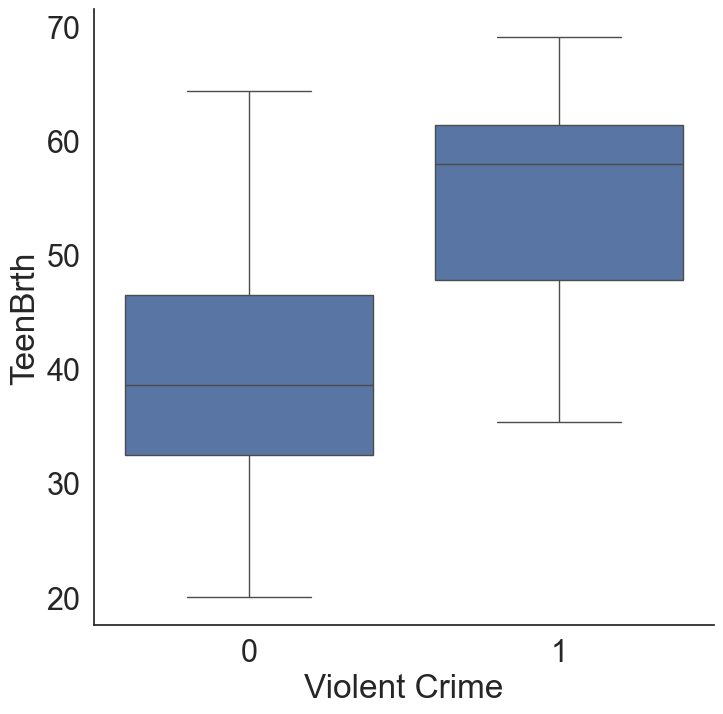

In [ ]:
## Regressing categorical variables
#sns.histplot(df['ViolCrime'], bins=10)
plt.xlabel('Violent Crime')

df['ViolCrime'].describe()

# add a new categorical column for a 'Violent' state, arbitrarily pick a threshold from histogram
df['Violent'] = df['ViolCrime'].apply(lambda x: 0 if x < 11 else 1)
df.head()

sns.boxplot(x='Violent', y='TeenBrth', data=df);

mod = smf.ols(formula='TeenBrth ~ PovPct + C(Violent)', data=df)
res = mod.fit()
print(res.summary())

#### Comparison of means:
* t-tests, ANOVA, cohen's d (effect sizes)
* Assumptions matter

# Difference in means: t-test

The t-test tests for a difference in means between two groups.  Now that we have a categorical variable we can use a t-test to ask if there is a difference between violent states and non-violent ones in terms of teen birth rate

Student's t-test assumptions:

- Data are continuous
- Normally distributed
- Large enough sample size
- Equal variance b/w groups

$H_0: \mu_{x} = \bar y$

$H_a: \mu_{x} \ne \bar y$

In [ ]:
 df.groupby(['Violent'])['TeenBrth'].mean()

Violent
0    40.306818
1    54.414286
Name: TeenBrth, dtype: float64

$H_0: \bar x_{ViolentTeenBirthRate} = \bar y_{NotViolentTeenBirthRate}$

$H_a: \bar x_{ViolentTeenBirthRate} \ne \bar y_{NotViolentTeenBirthRate}$

In [ ]:
group1 = df.where(df.Violent==0).dropna()['TeenBrth']
group2 = df.where(df.Violent==1).dropna()['TeenBrth']

ttest_ind(group1, group2)

TtestResult(statistic=-3.0370000153560155, pvalue=0.003822412806535174, df=49.0)

The p-value here is $0.004$ ...which means that observing this difference in means due to random chance alone is unlikely.

By standard inferential threshold of $p=0.05$ we could reject the null in favor of the alternative hypothesis, concluding that the means between the groups are not the same.

NOW bad news... if we pick a different threshold for violence in a state, or if we kept DC in the data these values (and conclusion) would probably change!


# Multicolinearity
Lets force a colinearity problem by making a synthetic variable to show you what to look out for...
Specifically note that
1. condition number is large... that's diagnosing the issue
2. coefficient on violent crime changes dramatically from before
3. coefficient on pseudoVC is similar in magnitude to violent crime, robbing it of the explanatory power it deserves
4. the sum of coefficients doesn't arrive at the total it was at in previous model... again robbing it of explanatory power

In [ ]:
# np.random.rand() allows us to add randon noise
# creating a column called pseudoVC that is: 3.6ViolCrime+112+Random Noise
df['pseudoVC'] = df['ViolCrime'] * 3.6 + 112 + 5*np.random.rand(len(df))
mod = smf.ols(formula='TeenBrth ~ PovPct + ViolCrime + pseudoVC', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     20.05
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.65e-08
Time:                        16:20:31   Log-Likelihood:                -178.92
No. Observations:                  51   AIC:                             365.8
Df Residuals:                      47   BIC:                             373.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8608    103.417      0.028      0.9

# Regression with transformed data

So far, we've been working with data that were approximately Normal and didn't require transformation. But that won't always be the case...

In [ ]:
sleep = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/msleep.csv')
sleep.head()
# What if we were interested in quantifying the **effect that REM sleep has on total sleep**?
# We may hypothesize that the more REM sleep an animal gets the less total sleep it needs.

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


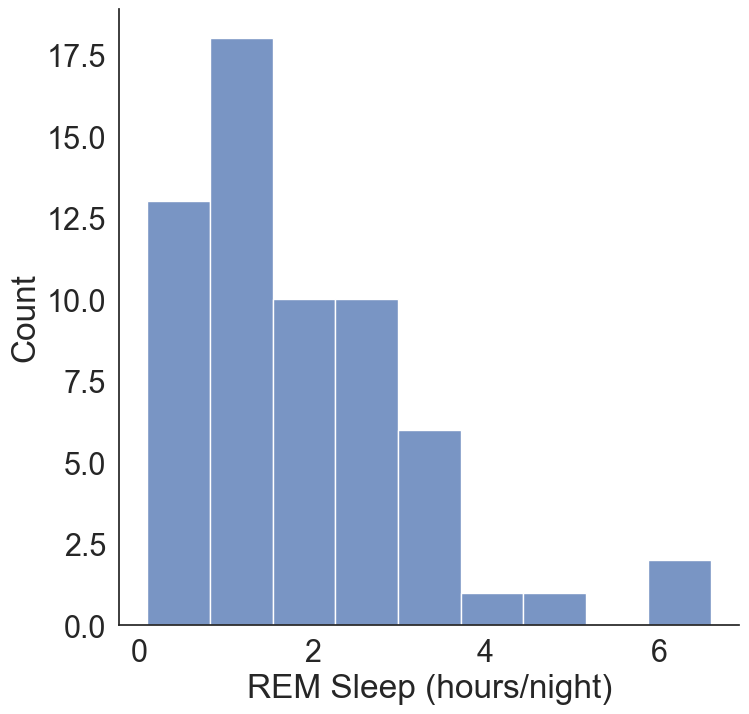

In [ ]:
sns.histplot(sleep['sleep_rem'].dropna())
plt.xlabel('REM Sleep (hours/night)');
#These data are skewed right, and transforming these data could help us use them in analysis...

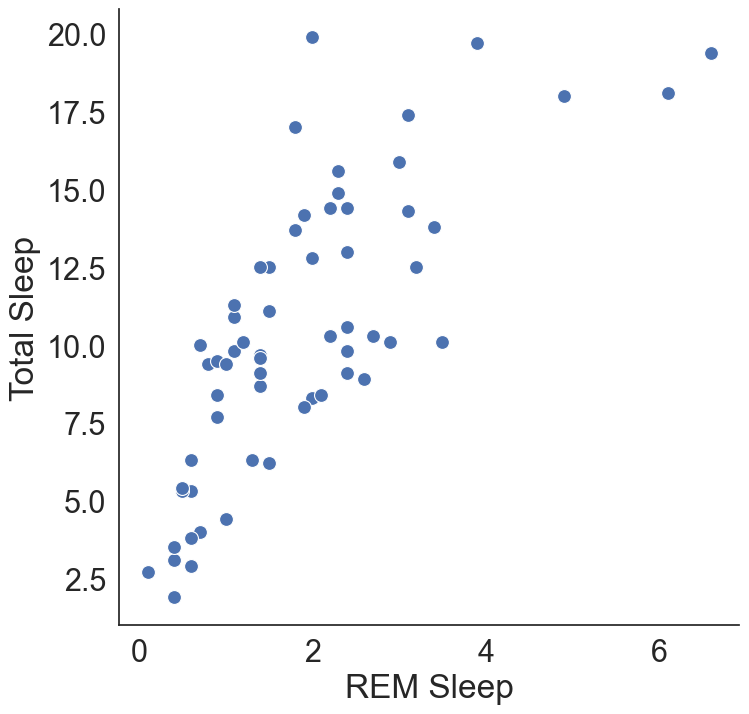

In [ ]:
sns.scatterplot(x='sleep_rem', y='sleep_total', data=sleep, s=100)
plt.xlabel('REM Sleep')
plt.ylabel('Total Sleep');

In [ ]:
# add in log transformed column
sleep['sleep_rem10'] = np.log(sleep['sleep_rem'])

# Linear regression with transformed data
# carry out regression using log-transformed predictor

mod = smf.ols(formula='sleep_total ~ sleep_rem10', data=sleep)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            sleep_total   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     100.9
Date:                Mon, 19 May 2025   Prob (F-statistic):           2.18e-14
Time:                        16:31:02   Log-Likelihood:                -147.84
No. Observations:                  61   AIC:                             299.7
Df Residuals:                      59   BIC:                             303.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.5686      0.399     21.473      

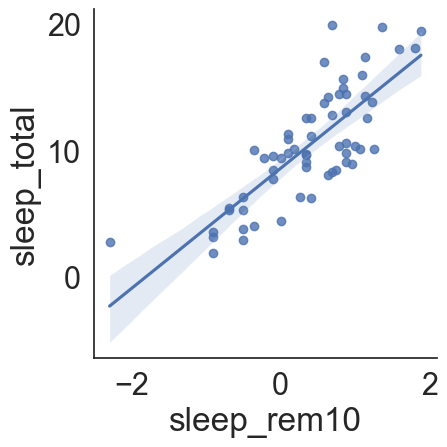

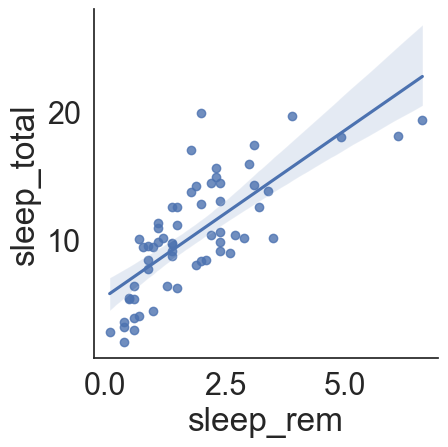

In [ ]:
# view our log transformed lmplot
sns.lmplot(x='sleep_rem10',y='sleep_total',data=sleep);
# compare above to the lmplot without log transformation
sns.lmplot(x='sleep_rem',y='sleep_total',data=sleep);

Here, we see that the $\beta_1$ estimate for `sleep_rem10` is 4.73....but remember that this value is on the log scale.

$$ Total Sleep = 8.57 + 4.73 *log_{10}(REM Sleep) $$

To interpret this coefficient, we would say that

a 1 unit increase in REM sleep, Total Sleep increases by $\approx$ $4.73/100$ units.

So, for each 1 hour increase in REM Sleep, Total Sleep increases by 0.05 hours.

That's not a large effect, but it is different than what we hypothesized at the beginning!
More on interpretation of log transformed variables can be read [here](https://www.cscu.cornell.edu/news/statnews/stnews83.pdf)

### Why is log-transformation not math trickery?

First, some reading on data transformation can be found [here](http://fmwww.bc.edu/repec/bocode/t/transint.html). It's not beautifully formatted, but I think it is written in a more-straightforward manner than some [other](https://stats.stackexchange.com/questions/4831/regression-transforming-variables/4833#4833) [places](https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va) [online](https://www.researchgate.net/post/Why_do_we_do_transformation_before_data_analysis).

But a basic understanding can be had in just a few bullet points
- measurement scales may be arbitrary. there's nothing to say log transforms aren't a better measurement scale than the original
- you are already familiar with many logrithmic measurement scales: decibels and Richter scale for measuring earthqueakes are two examples
- lots of things are power-law distributed or close to power-law distributed... the frequency of words in a language, human vision and auditory abilities in perception, the number of social media followers people have.
- log transforms make a process that had been multiplicative or power law like ($a*b^n$) into an additive process ($a+n*b$) which really helps when you're trying to apply linear regression for obvious reasons
- log transforms can reduce heteroscadacity and skewness, which may make the data amenable to linear regression when it hadn't been before

The first thing to remember is there is (in most cases) nothing special about how the data are originally expressed.

In our example above, there is nothing about "hours" as the unit that was chosen that makes these data "correct".

So, while it _feels_ like data transformation is trickery, our initial unit of hours is...in some ways arbitrary and something that we chose.

This is where we'll start with our argument that it's ok to transform (or think of it as *re-express*) our data
so that it can be (still-accurately) used with well-studied models.

To make the point a little more concretely, all the following things are measured on a log scale: pH (measurement of acidity), dB (measure of sound loudness), and Richter scale (earthquake intensity). All of them _could_ be measured  on a linear scale. Those measurements would still explain those things...it would just be on a different scale.

In other words:
    
> "Transformations are needed because there is no guarantee that the world works on the scales it happens to be measured on."
>
> What *does* differ however, is the interprtation. Linear scales tell us absolute change, while logarithmic scales tell us relative change.

# Differences in means by ANOVA

What if we have more than two possible levels in our categorical variable?  T-tests are for only two things, e.g. male/female, violent/non-violent.  What if we have regions of the US, like midwest, west, northeast... there's more than two of those!

Thats where a group-wise test like ANOVA (Analysis of Variance) is perfect

Parametric ANOVA test assumptions

- Population distributions are normal
- Samples have equal variances
- Independence

Hypothesis

$H_0: \mu_1 = \mu_2 = \mu_3 \ldots $

$H_a: $ at least one group mean is different

In [ ]:
regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
regions = regions.rename({'State':'Location'},axis=1).set_index('Location')
regions.index = regions.index.str.replace(' ','_')

In [ ]:
df = df.join(regions['Region'])
df

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth,Region
Location,,,,,,
Alabama,20.1,31.5,88.7,11.2,54.5,South
Alaska,7.1,18.9,73.7,9.1,39.5,West
Arizona,16.1,35.0,102.5,10.4,61.2,West
Arkansas,14.9,31.6,101.7,10.4,59.9,South
California,16.7,22.6,69.1,11.2,41.1,West
Colorado,8.8,26.2,79.1,5.8,47.0,West
Connecticut,9.7,14.1,45.1,4.6,25.8,Northeast
Delaware,10.3,24.7,77.8,3.5,46.3,South
District_of_Columbia,22.0,44.8,101.5,65.0,69.1,South


So how would you run an ANOVA checking for a difference in TeenBrth across regions?

this is left as an exercise for you. But there are two major options for you.  If you want to manually group the categorical variable ($\bar x_1 = \bar x_2 = \bar x_3$) you can use scipy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

If you want to build a model that is more precise or custom, with automatic grouping by a variable inside the dataframe then you can use statsmodels:
https://www.statsmodels.org/dev/anova.html